In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [30]:
# Load dataset
k = '/content/bank.zip'
df = pd.read_csv(k)

# Display dataset info
print(df.head())
print(df.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

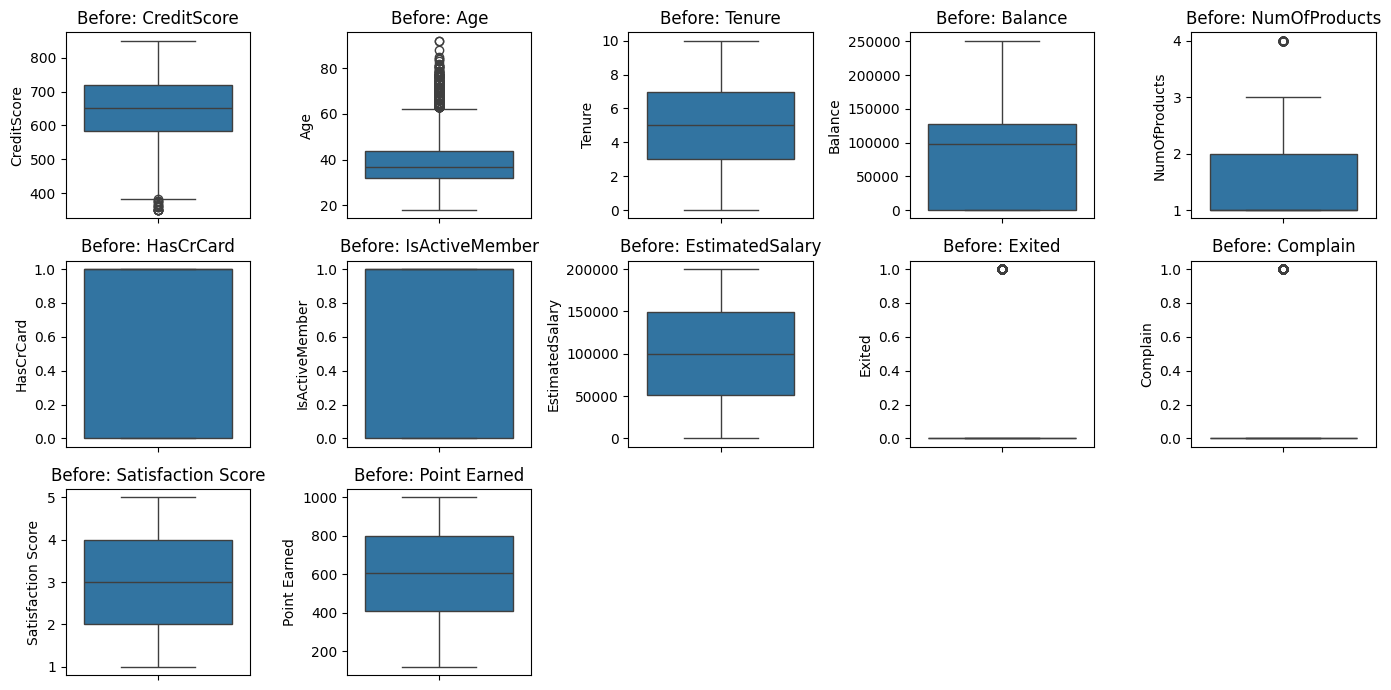

In [31]:
# Columns to analyze
columns_to_plot = ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
                   'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
                   'Point Earned']

# **Step 1: Box Plots Before Removing Outliers**
plt.figure(figsize=(14, 7))
for i, col in enumerate(columns_to_plot[2:], 1):  # Excluding RowNumber & CustomerId
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Before: {col}')
plt.tight_layout()
plt.show()

In [32]:
# **Detect outliers using IQR method**
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Finding outliers in each numerical column
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']
outliers = pd.concat([detect_outliers(df, col) for col in num_cols]).drop_duplicates()
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 432


Dataset size before: (10000, 18), after removing outliers: (9568, 18)


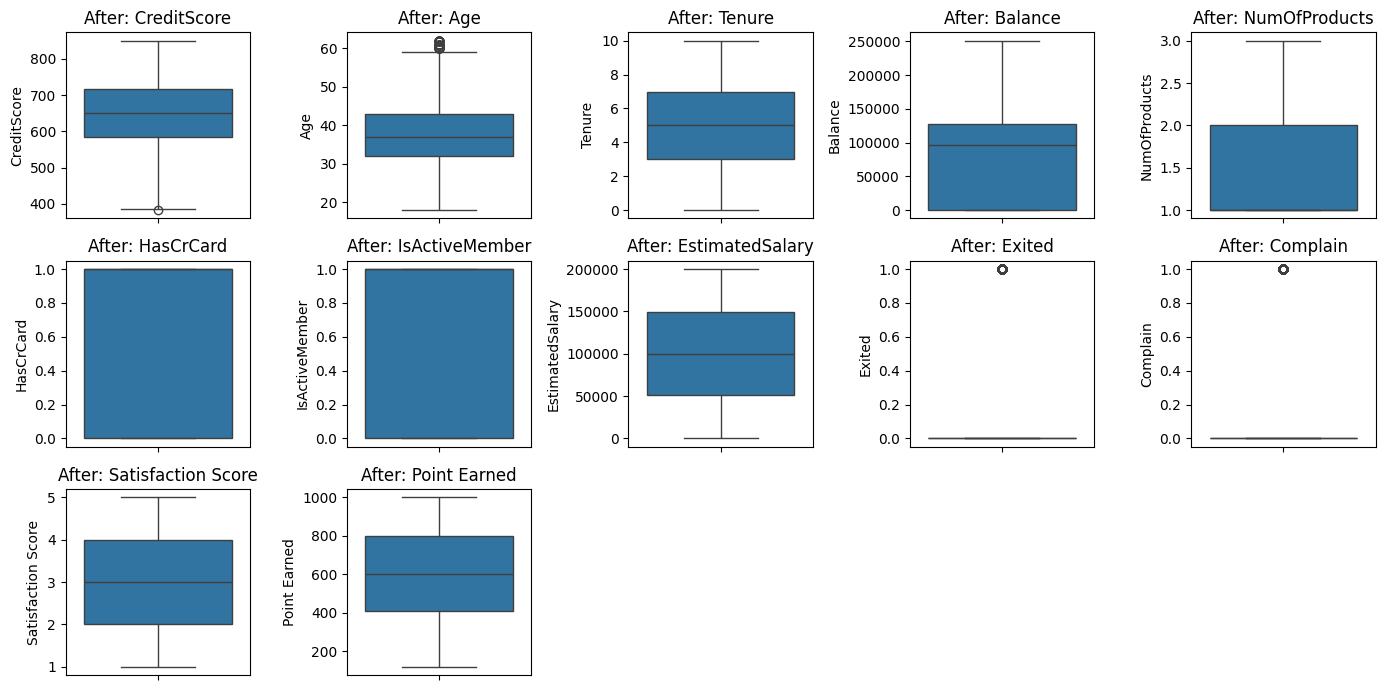

In [33]:
# **Step 2: Remove Outliers**
df_cleaned = df.drop(outliers.index)
print(f"Dataset size before: {df.shape}, after removing outliers: {df_cleaned.shape}")

# **Box Plots After Removing Outliers**
plt.figure(figsize=(14, 7))
for i, col in enumerate(columns_to_plot[2:], 1):  # Excluding RowNumber & CustomerId
    plt.subplot(3, 5, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

# Encoding categorical features
le = LabelEncoder()
df_cleaned['Geography'] = le.fit_transform(df_cleaned['Geography'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned['Card Type'] = le.fit_transform(df_cleaned['Card Type'])

# Selecting features and target variable
X_clean = df_cleaned.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])  # Remove non-relevant columns
y_clean = df_cleaned['Exited']

# Splitting data into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)


In [34]:

# **Train Models (SVM & RF)**
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{label} - {model.__class__.__name__} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [35]:

# **Step 3: Compare Results Before & After Outlier Removal**
print("\n--- Model Results Before Removing Outliers ---")

# Encoding categorical features before removing outliers
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Card Type'] = le.fit_transform(df['Card Type'])

X_full = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])  # Features before removing outliers
y_full = df['Exited']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Evaluating before removing outliers
for model_name, model in models.items():
    evaluate_model(model, X_train_full, y_train_full, X_test_full, y_test_full, "Before Outliers Removal")

print("\n--- Model Results After Removing Outliers ---")

# Evaluating after removing outliers
for model_name, model in models.items():
    evaluate_model(model, X_train_clean, y_train_clean, X_test_clean, y_test_clean, "After Outliers Removal")



--- Model Results Before Removing Outliers ---

Before Outliers Removal - SVC Results:
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Before Outliers Removal - RandomForestClassifier Results:
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


--- Model Results After Removing Outliers ---

After Outliers Removal - SVC Results:
Accuracy: 0.9989550679205852
              precision    recall  f1-score   suppor

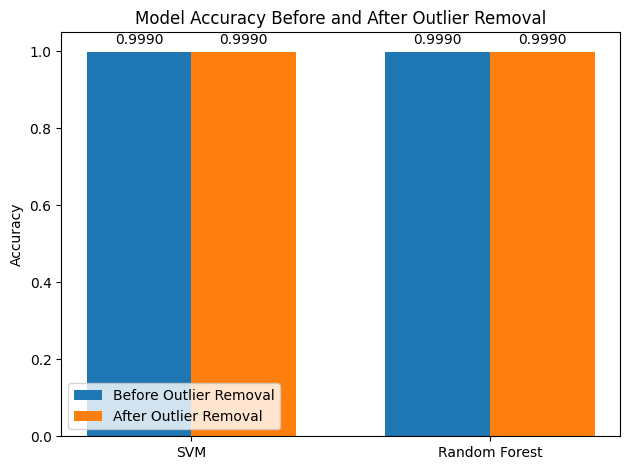

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Provided accuracy scores
accuracy_before_svm = 0.999
accuracy_after_svm = 0.9989550679205852
accuracy_before_rf = 0.999
accuracy_after_rf = 0.9989550679205852

# Create a bar chart
models = ['SVM', 'Random Forest']
before_accuracy = [accuracy_before_svm, accuracy_before_rf]
after_accuracy = [accuracy_after_svm, accuracy_after_rf]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_accuracy, width, label='Before Outlier Removal')
rects2 = ax.bar(x + width/2, after_accuracy, width, label='After Outlier Removal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Before and After Outlier Removal')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),  # Format to 4 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()